In [54]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#read file directory
import os
for dirname, _, filenames in os.walk(r'D:\Technology\Datasets\customer-shopping-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


D:\Technology\Datasets\customer-shopping-dataset\analysis suggestion for dataset of shopping data in Istanbul.docx
D:\Technology\Datasets\customer-shopping-dataset\customer_shopping_data.csv
D:\Technology\Datasets\customer-shopping-dataset\~$alysis suggestion for dataset of shopping data in Istanbul.docx


In [11]:
#import file
ShoppingRetailDf=pd.read_csv(r'D:\Technology\Datasets\customer-shopping-dataset\customer_shopping_data.csv')

In [12]:
#Check any duplicate data
print("Check Duplicate")
print(ShoppingRetailDf.duplicated().sum())

Check Duplicate
0


In [13]:
#Generate data information
print("Data Description")
print(ShoppingRetailDf.describe())
print("Data Information")
print(ShoppingRetailDf.info())
print("Null Data Identification")
print(ShoppingRetailDf.isnull().sum())

Data Description
                age      quantity         price
count  99457.000000  99457.000000  99457.000000
mean      43.427089      3.003429    689.256321
std       14.990054      1.413025    941.184567
min       18.000000      1.000000      5.230000
25%       30.000000      2.000000     45.450000
50%       43.000000      3.000000    203.300000
75%       56.000000      4.000000   1200.320000
max       69.000000      5.000000   5250.000000
Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method 

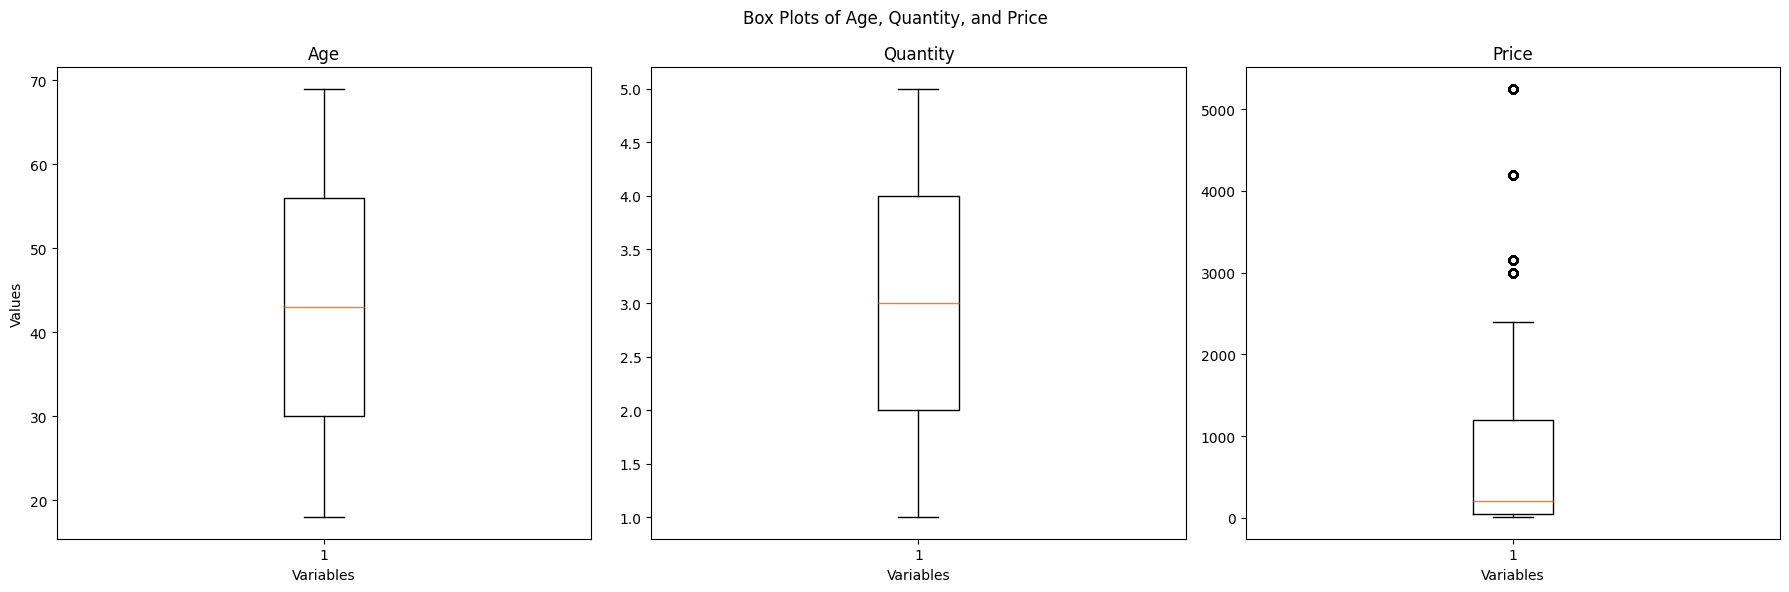

In [14]:
#Identify Outliers using Box plot

# Create subplots with different y-axis scales
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Plot Age
axes[0].boxplot(ShoppingRetailDf['age'])
axes[0].set_title('Age')
axes[0].set_ylabel('Values')

# Plot Quantity
axes[1].boxplot(ShoppingRetailDf['quantity'])
axes[1].set_title('Quantity')

# Plot Price
axes[2].boxplot(ShoppingRetailDf['price'])
axes[2].set_title('Price')

# Set common xlabel
for ax in axes:
    ax.set_xlabel('Variables')

plt.suptitle('Box Plots of Age, Quantity, and Price')
plt.tight_layout()
plt.show()

In [15]:
#Calculate IQR to identify outliers of Age, Quantity, and Price, heuristic established by John Tukey
column_to_check=['age', 'quantity', 'price']
for column in column_to_check:
    Q1 = ShoppingRetailDf[column].quantile(0.25)
    Q3 = ShoppingRetailDf[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Min and Max values of {column}:")
    print(ShoppingRetailDf[column].min(), ShoppingRetailDf[column].max())

    # Identify outliers
    outliers = ShoppingRetailDf[(ShoppingRetailDf[column] < lower_bound) | (ShoppingRetailDf[column] > upper_bound)]
    
    if outliers.empty:
        print(f"Outliers Identification for {column}:")
        print("No Outliers Detected")
    else:
        print(f"Outliers Identification for {column}:")
        print(outliers)


Min and Max values of age:
18 69
Outliers Identification for age:
No Outliers Detected
Min and Max values of quantity:
1 5
Outliers Identification for quantity:
No Outliers Detected
Min and Max values of price:
5.23 5250.0
Outliers Identification for price:
      invoice_no customer_id  gender  age    category  quantity    price  \
3        I173702     C988172  Female   66       Shoes         5  3000.85   
15       I688768     C362288    Male   24       Shoes         5  3000.85   
23       I252275     C313348    Male   44  Technology         5  5250.00   
53       I160777     C626042  Female   43  Technology         4  4200.00   
69       I883721     C236859  Female   44  Technology         5  5250.00   
...          ...         ...     ...  ...         ...       ...      ...   
99332    I206967     C232954  Female   53       Shoes         5  3000.85   
99374    I221532     C956894    Male   36  Technology         3  3150.00   
99387    I429361     C258359    Male   33  Technology     

In [16]:
#Cleaning data
#invoice_date: Convert to Date and Time
#There must be columns for Year, Day, and Month
#No missing Value in Dataset
#No outliers in Dataset
#Copy dataset before cleaning
ShoppingRetail=ShoppingRetailDf.copy()

In [17]:
#Convert invoice_date into date format
ShoppingRetail['invoice_date'] = pd.to_datetime(ShoppingRetail['invoice_date'], format='%d/%m/%Y')

#Invoice_date split into Day, Month, and Year
ShoppingRetail['Year']=ShoppingRetail['invoice_date'].dt.year
ShoppingRetail['month']=ShoppingRetail['invoice_date'].dt.month
ShoppingRetail['day']=ShoppingRetail['invoice_date'].dt.day

#show data samples after cleaning
data_info_clean=ShoppingRetail.info()
print("Data Information")
print(data_info_clean)
data_sample_clean=ShoppingRetail.head()
print("Data Sample")
print(data_sample_clean)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
 10  Year            99457 non-null  int32         
 11  month           99457 non-null  int32         
 12  day             99457 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(2), object(6)
memory usage: 8.7+ MB
Data Information
Non

In [18]:
#Check duplicate in invoice_data after cleaning
invoice_date_duplicate= print(ShoppingRetail['invoice_date'].duplicated().sum())
if invoice_date_duplicate is None:
    print("Invoice Date Duplication Identification")
    print("No Duplication Detected")
else:
    print("Invoice Date Duplication Identification")
    print(invoice_date_duplicate)


98660
Invoice Date Duplication Identification
No Duplication Detected


In [19]:
#Check null value in invoice_date after cleaning
invoice_date_null=print(ShoppingRetail['invoice_date'].isnull().sum())
if invoice_date_null is None:
    print("Invoice Date Null Identification")
    print("No Null Value Detected")
else:
    print("Invoice Date Null Identification")
    print(invoice_date_null)

0
Invoice Date Null Identification
No Null Value Detected


In [20]:
#save copied data to csv
ShoppingRetail.to_csv('copied_customer_shopping_data.csv', index=False)


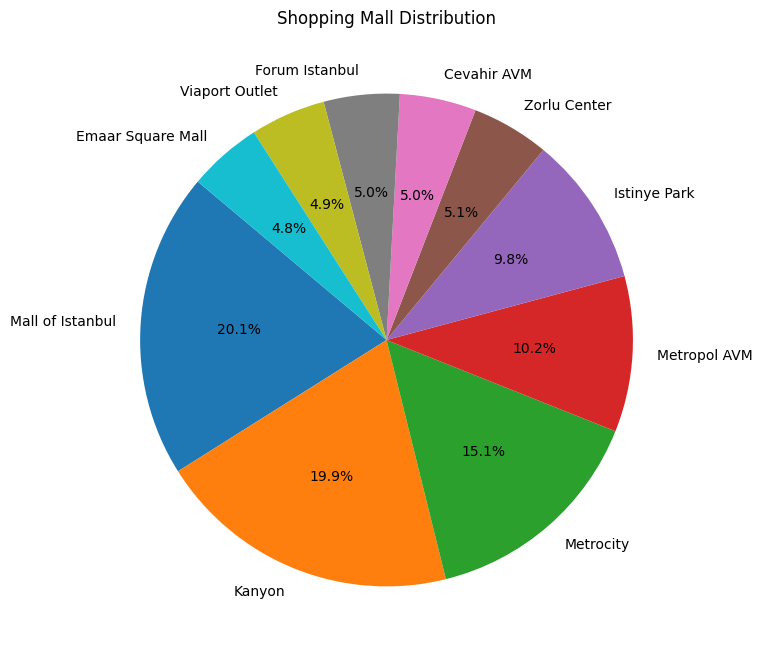

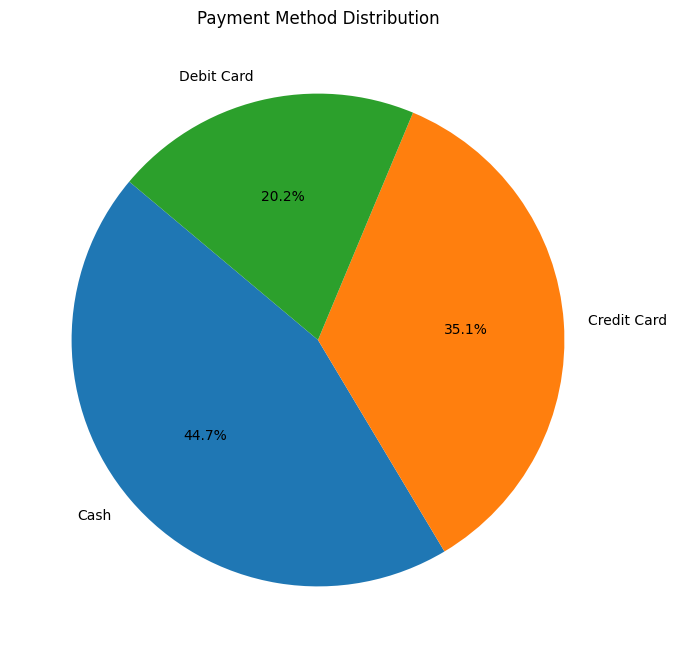

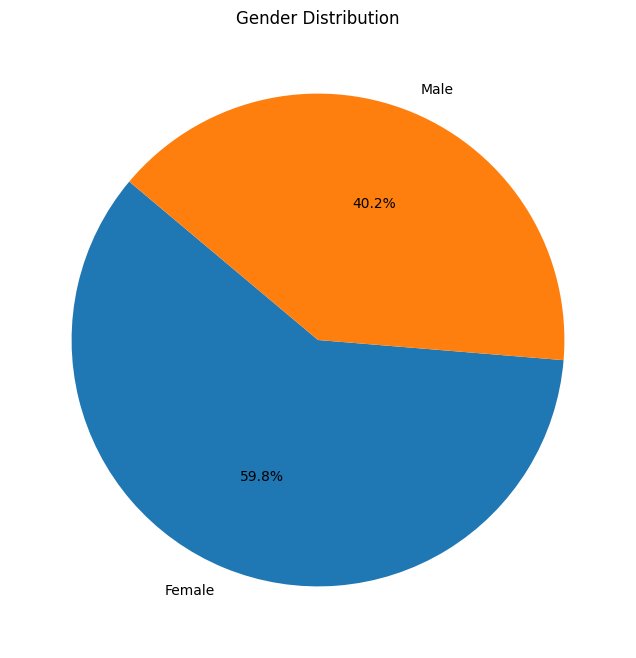

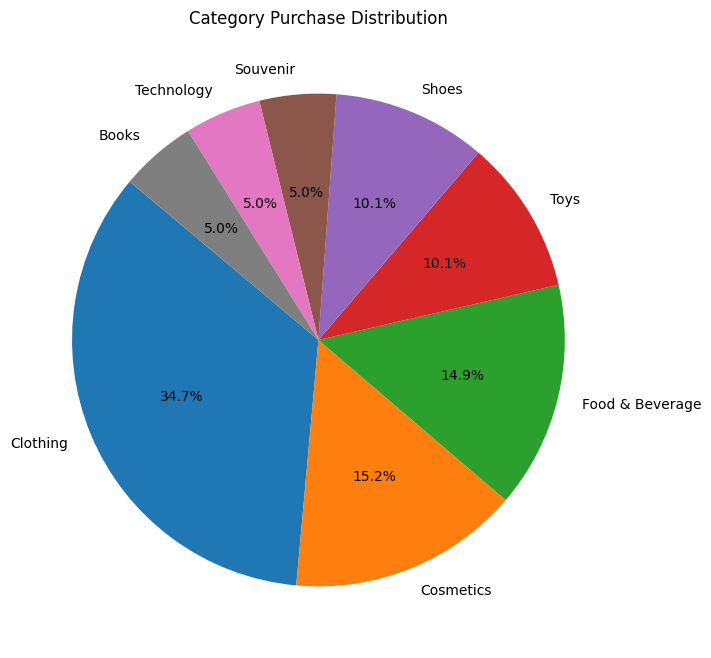

In [21]:
#Univariate analysis
shopping_mall= ShoppingRetail['shopping_mall'].value_counts()
category=ShoppingRetail['category'].value_counts()
payment= ShoppingRetail['payment_method'].value_counts()
gender= ShoppingRetail['gender'].value_counts()

#function to plot pie chart
def plot_pie(data,title):
    plt.figure(figsize=(8,8))
    plt.pie(data,labels=data.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

# Plot pie charts
plot_pie(shopping_mall, 'Shopping Mall Distribution')
plot_pie(payment, 'Payment Method Distribution')
plot_pie(gender, 'Gender Distribution')
plot_pie(category, 'Category Purchase Distribution')

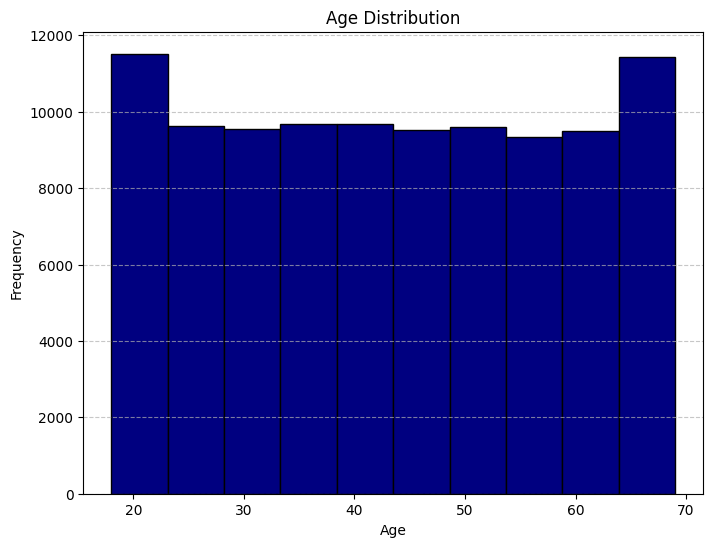

In [22]:
#Univariate analysis
#Age distribution
age=ShoppingRetail['age']
plt.figure(figsize=(8, 6))
plt.hist(age, bins=10, edgecolor='black', color='navy')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Putri Dyah Masyitah\AppData\Local\Temp\ipykernel_8512\4221340842.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_transactions = ShoppingRetail.resample('M').size()  # Monthly frequency
C:\Users\Putri Dyah Masyitah\AppData\Local\Temp\ipykernel_8512\4221340842.py:9: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_transactions = ShoppingRetail.resample('Y').size()   # Yearly frequency


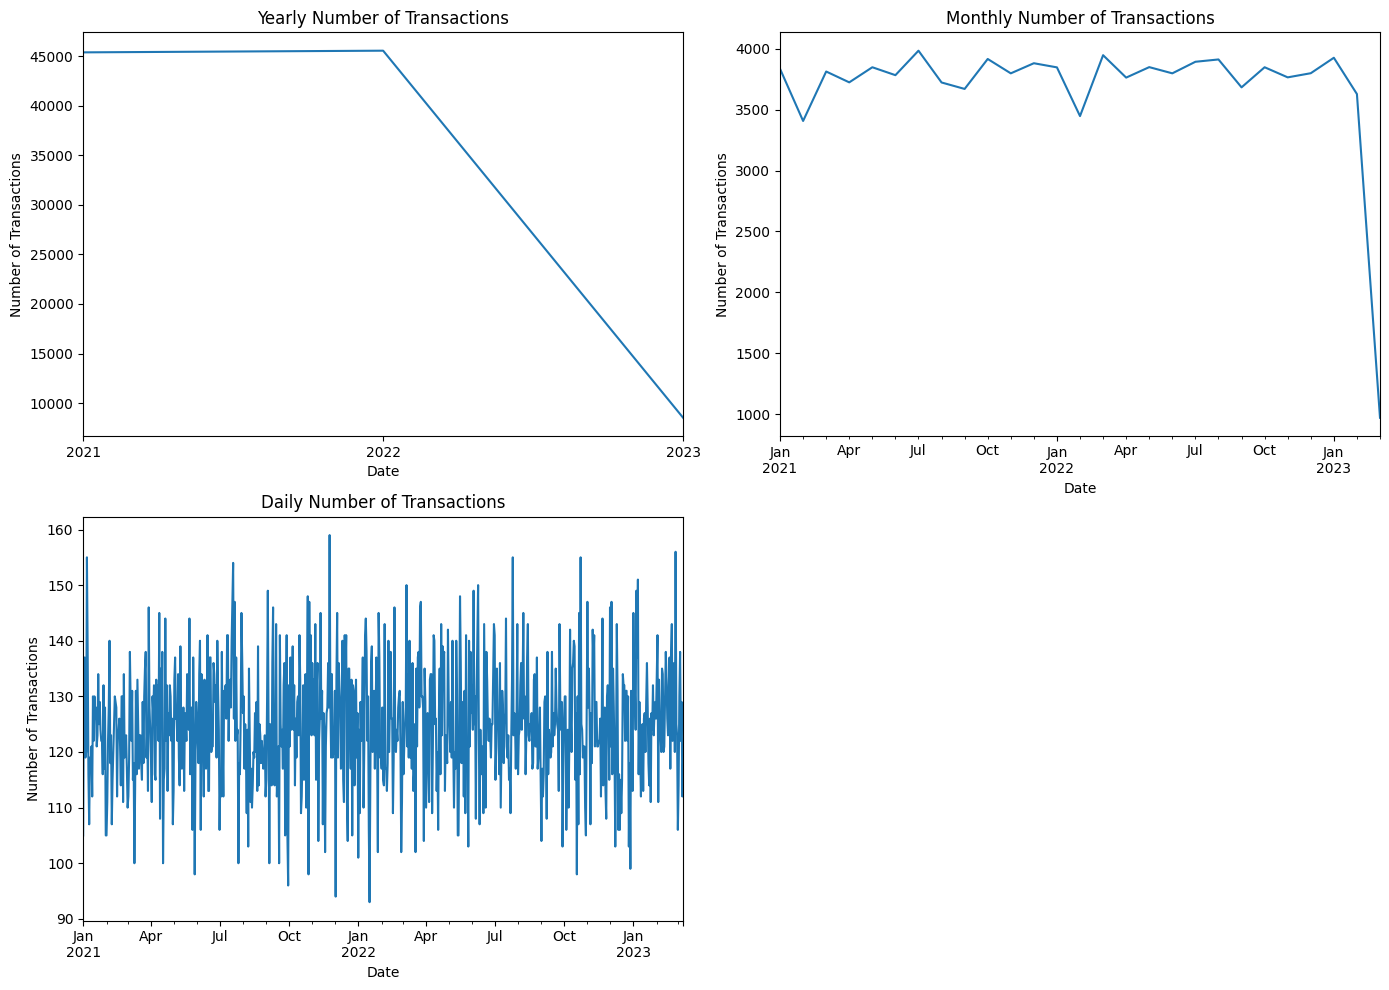

In [23]:
# Time series analysis for numbers of transactions

# Set 'invoice_date' as the index for time series analysis
ShoppingRetail.set_index('invoice_date', inplace=True, drop=False)

# Resampling and aggregating the data
daily_transactions = ShoppingRetail.resample('D').size()    # Daily frequency
monthly_transactions = ShoppingRetail.resample('M').size()  # Monthly frequency
yearly_transactions = ShoppingRetail.resample('Y').size()   # Yearly frequency

# Plotting number of transactions
plt.figure(figsize=(14, 10))

# Yearly Transactions
plt.subplot(2, 2, 1)
yearly_transactions.plot(title='Yearly Number of Transactions')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')

# Monthly Transactions
plt.subplot(2, 2, 2)
monthly_transactions.plot(title='Monthly Number of Transactions')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')

# Daily Transactions
plt.subplot(2, 2, 3)
daily_transactions.plot(title='Daily Number of Transactions')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')

plt.tight_layout()
plt.show()

C:\Users\Putri Dyah Masyitah\AppData\Local\Temp\ipykernel_8512\400658239.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = ShoppingRetail.resample('M').agg({'price': 'sum'})  # Monthly frequency
C:\Users\Putri Dyah Masyitah\AppData\Local\Temp\ipykernel_8512\400658239.py:9: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sales = ShoppingRetail.resample('Y').agg({'price': 'sum'})   # Yearly frequency


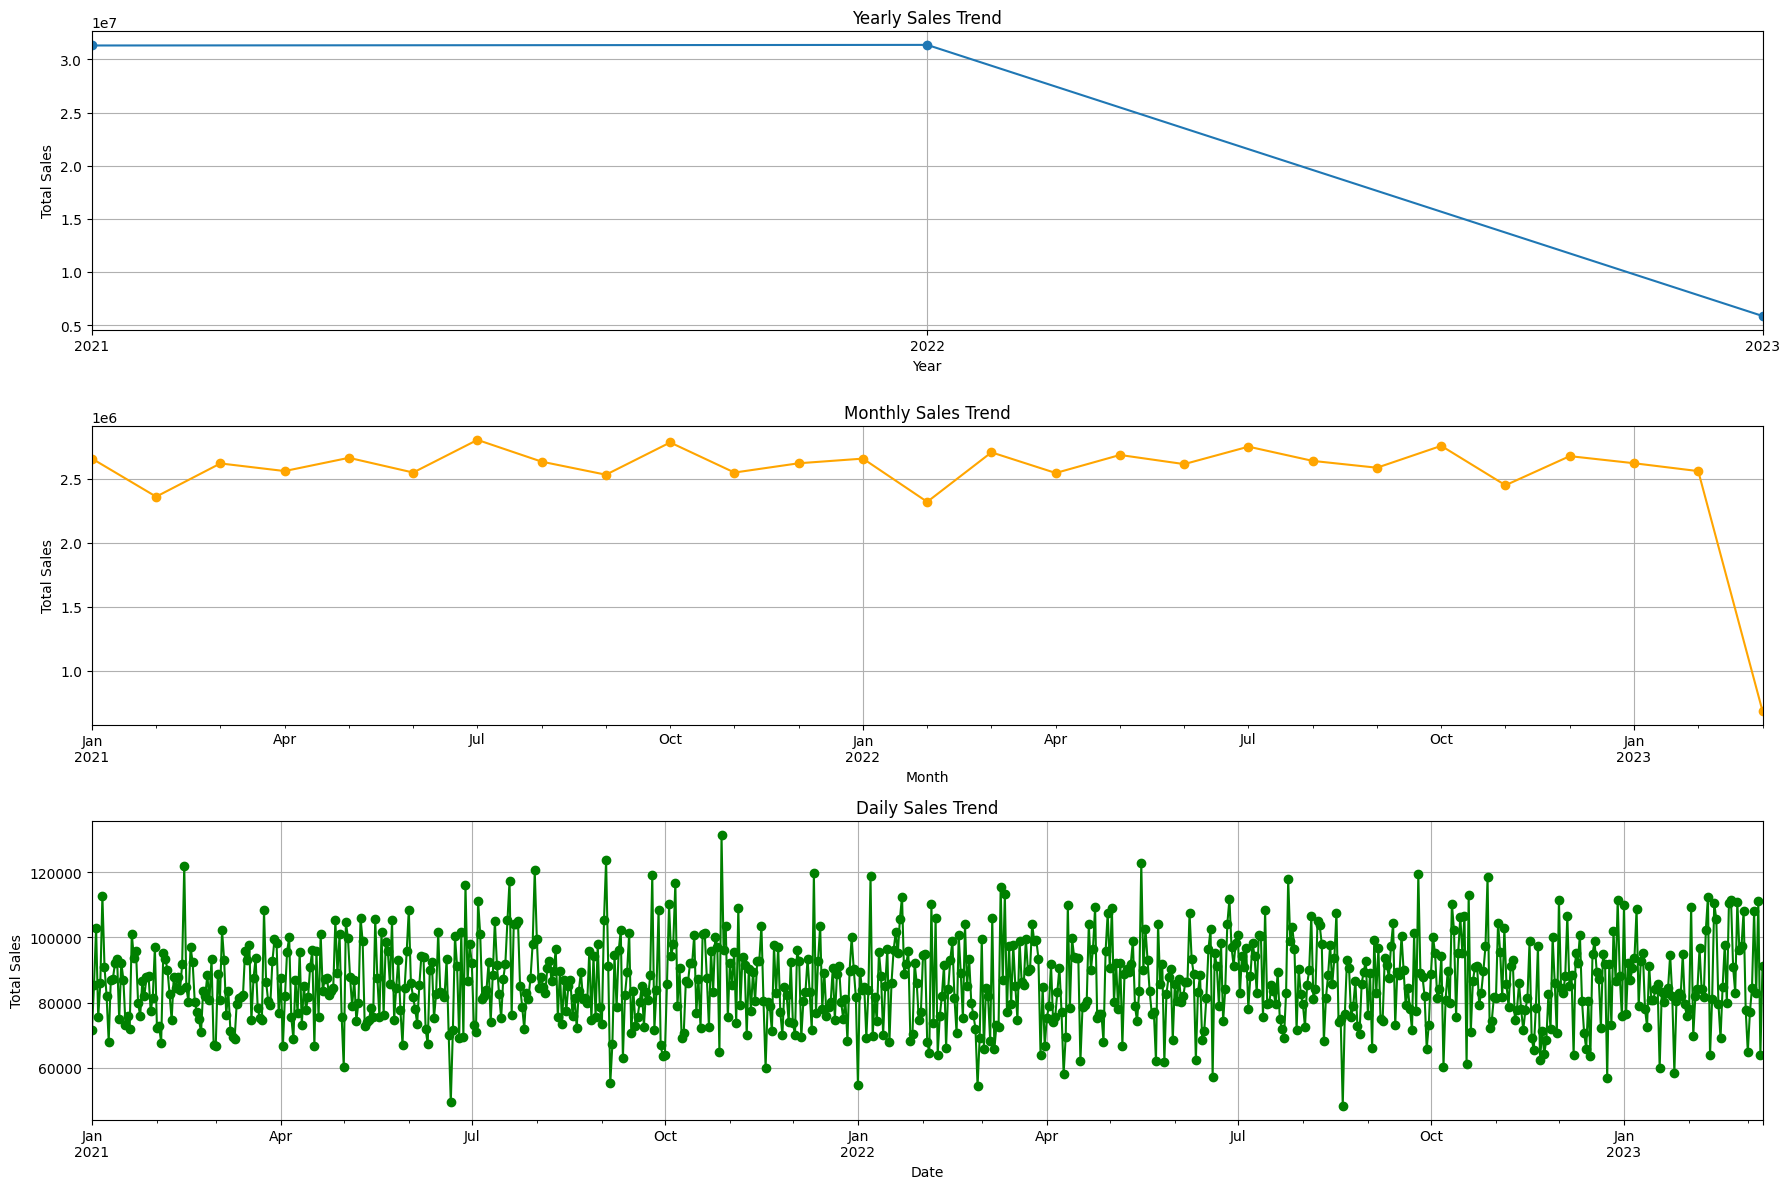

In [24]:
# Time series analysis for numbers of total sales

# Set 'invoice_date' as the index for time series analysis
ShoppingRetail.set_index('invoice_date', inplace=True, drop=False)

# Resampling and aggregating the data
daily_sales = ShoppingRetail.resample('D').agg({'price': 'sum'})    # Daily frequency
monthly_sales = ShoppingRetail.resample('M').agg({'price': 'sum'})  # Monthly frequency
yearly_sales = ShoppingRetail.resample('Y').agg({'price': 'sum'})   # Yearly frequency

# Plotting sales trends
plt.figure(figsize=(18, 12))

# Yearly Sales Trend
plt.subplot(3, 1, 1)
yearly_sales['price'].plot(title='Yearly Sales Trend', marker='o')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)

# Monthly Sales Trend
plt.subplot(3, 1, 2)
monthly_sales['price'].plot(title='Monthly Sales Trend', marker='o', color='orange')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)

# Daily Sales Trend
plt.subplot(3, 1, 3)
daily_sales['price'].plot(title='Daily Sales Trend', marker='o', color='green')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)

plt.tight_layout()
plt.show()

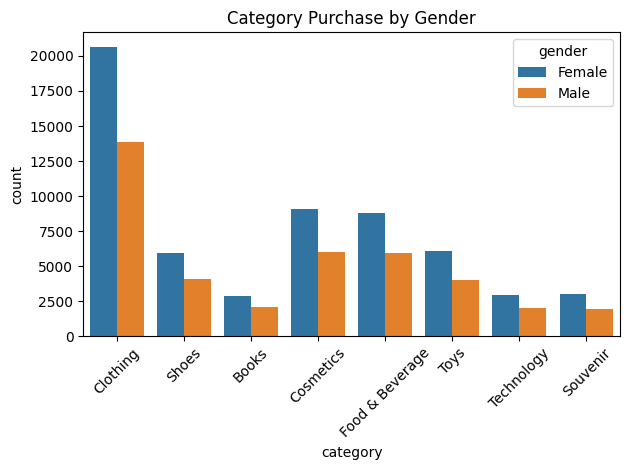

In [25]:
#Bivariate analysis of Gender and Category
sns.countplot(x='category', hue='gender', data=ShoppingRetail)
plt.title('Category Purchase by Gender')
plt.xticks(rotation=45)
plt.tight_layout() #ensures that all elements fit well within the plot area
plt.show()

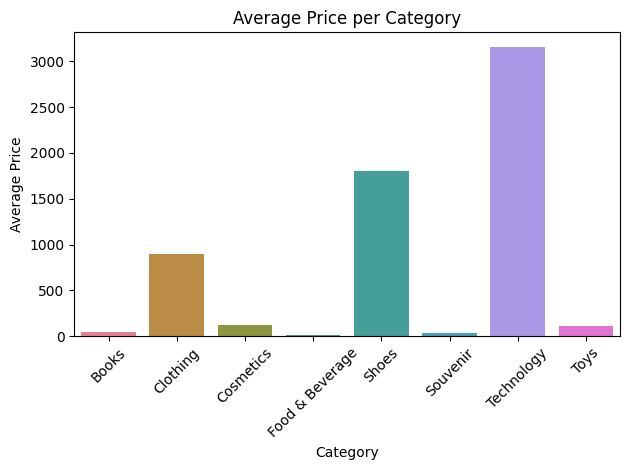

In [26]:
#Bivariate analysis of Category purchase and average of Price
avg_price= ShoppingRetail.groupby('category')['price'].mean().reset_index()
custom_palette = sns.color_palette("husl", len(avg_price['category'].unique()))
sns.barplot(x='category',y='price', hue='category',data=avg_price, palette=custom_palette,dodge=False, legend=False)
plt.title('Average Price per Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout() #ensures that all elements fit well within the plot area
plt.show()

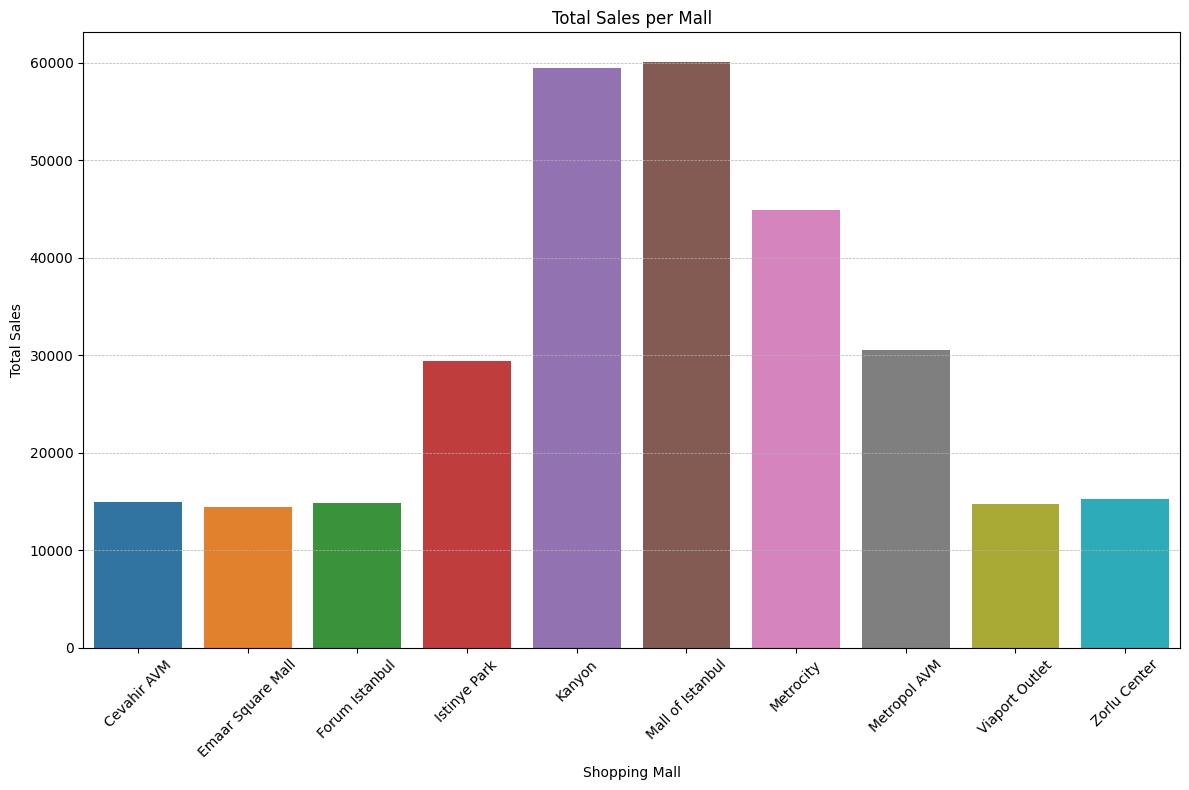

In [39]:
#Bivariate analysis of total Quantity sales per Mall

# Aggregate the total quantity of sales for each shopping mall
sum_quantity = ShoppingRetail.groupby('shopping_mall')['quantity'].sum().reset_index()

# Plotting the results
plt.figure(figsize=(12, 8))
sns.barplot(x='shopping_mall', y='quantity', hue='shopping_mall', data=sum_quantity)
plt.title('Total Sales per Mall')
plt.xticks(rotation=45)  # Rotate mall names for better readability
plt.xlabel('Shopping Mall')
plt.ylabel('Total Sales')
plt.grid(axis='y',linestyle='--', linewidth=0.5)
plt.tight_layout()  # Ensures that all elements fit well within the plot area
plt.show()


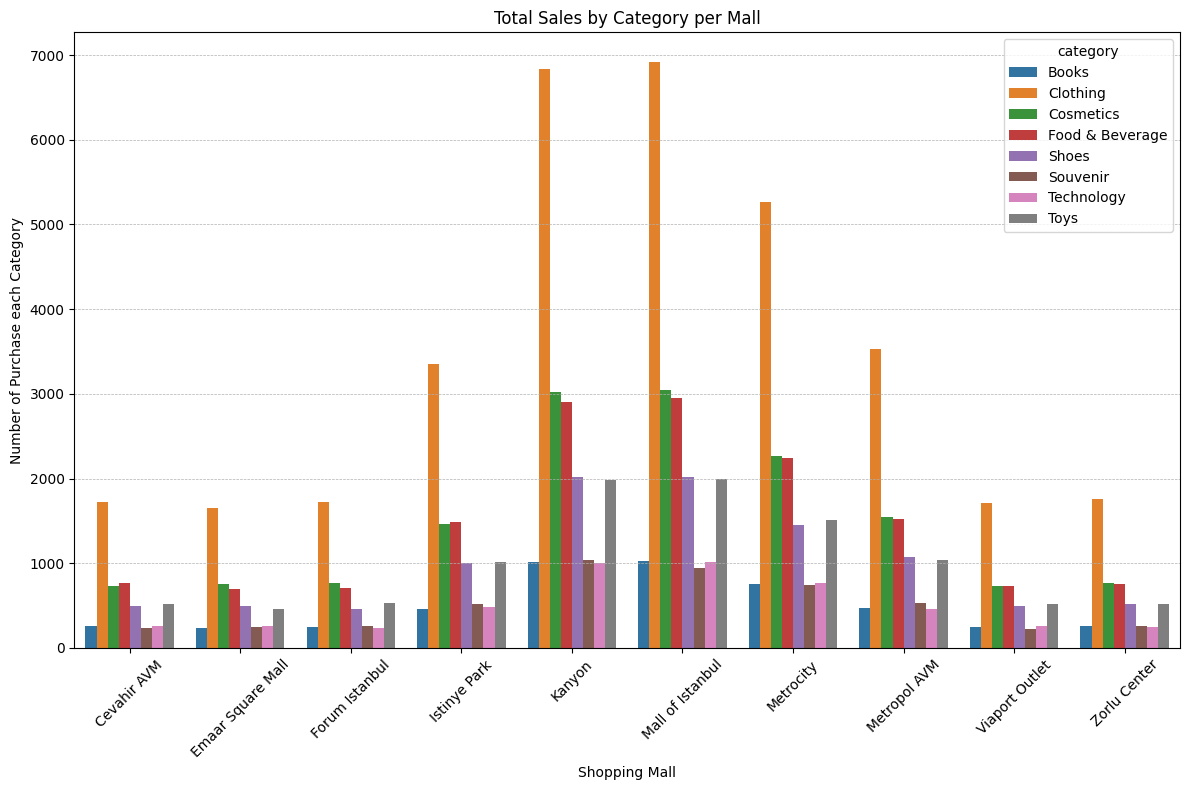

In [40]:
#Bivariate analysis of Category purchase per Mall

# Aggregate the total sales by category for each shopping mall
category_per_mall = ShoppingRetail.groupby(['shopping_mall', 'category']).size().reset_index(name='count')

# Plotting the results
plt.figure(figsize=(12, 8))
sns.barplot(x='shopping_mall', y='count', hue='category', data=category_per_mall)
plt.title('Total Sales by Category per Mall')
plt.xticks(rotation=45)  # Rotate mall names for better readability
plt.xlabel('Shopping Mall')
plt.ylabel('Number of Purchase each Category')
plt.grid(axis='y',linestyle='--', linewidth=0.5)
plt.tight_layout()  # Ensures that all elements fit well within the plot area
plt.show()


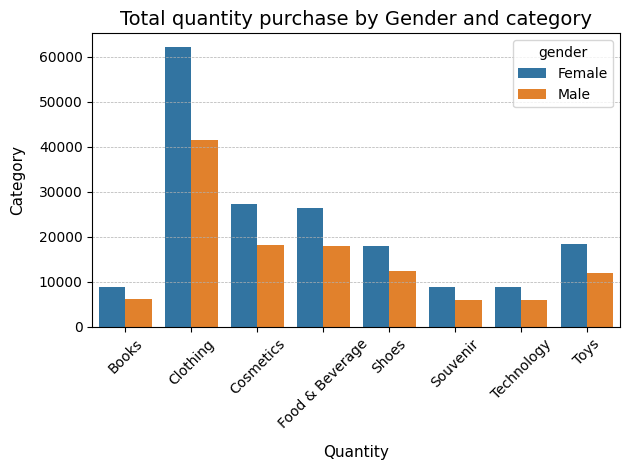

In [33]:
#Multivariate analysis of Gender, quantity and Category
sum_quantity= ShoppingRetail.groupby(['category','gender'])['quantity'].sum().reset_index()
sns.barplot(x='category', y='quantity', hue='gender', data=sum_quantity, dodge=True, legend=True)
plt.title('Total quantity purchase by Gender and category', fontsize=14)
plt.xlabel('Quantity', fontsize=11, labelpad=10)
plt.ylabel('Category', fontsize=11, labelpad=10)
plt.xticks(rotation=45)
plt.tight_layout() #ensures that all elements fit well within the plot area
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

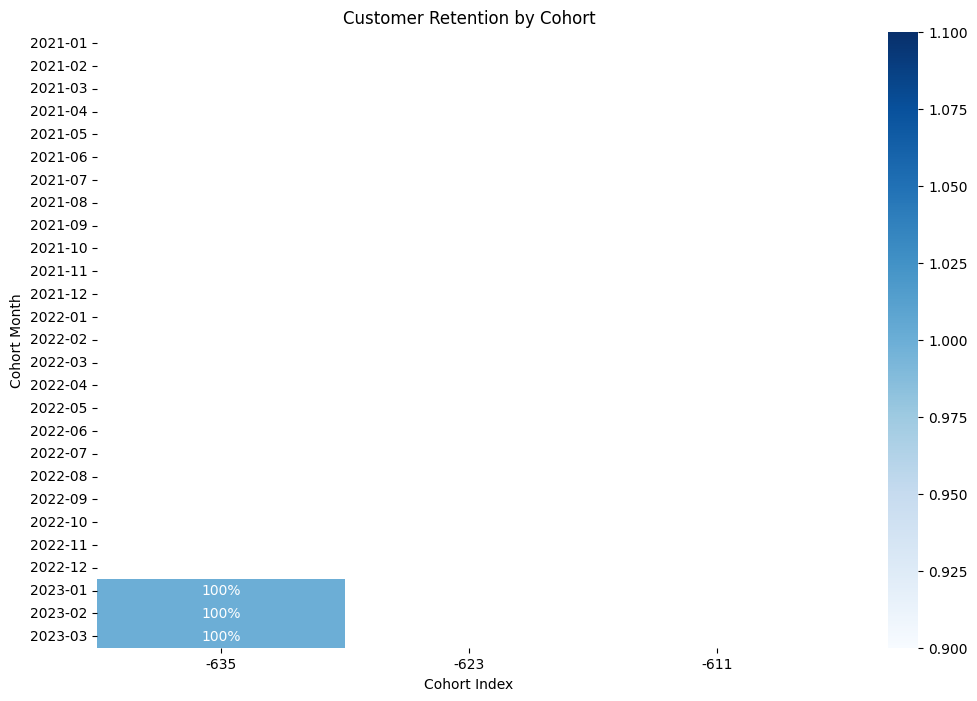

In [52]:
#Cohort Analysis
#Analyze customer retention and behavior over different time periods.

# Step 1: Extract the cohort month
ShoppingRetail['invoice_month'] = ShoppingRetail['invoice_date'].dt.to_period('M')
ShoppingRetail['cohort_month'] = ShoppingRetail.groupby('customer_id')['invoice_month'].transform('min')

# Step 2: Calculate the number of periods since the cohort month
ShoppingRetail['cohort_index'] = ShoppingRetail['month'].astype(int) - ShoppingRetail['cohort_month'].astype(int)

# Step 3: Create a cohort group
cohort_data = ShoppingRetail.groupby(['cohort_month', 'cohort_index']).agg({'customer_id': pd.Series.nunique}).reset_index()
cohort_data.rename(columns={'customer_id': 'customer_count'}, inplace=True)

# Step 4: Create a pivot table
cohort_pivot = cohort_data.pivot(index='cohort_month', columns='cohort_index', values='customer_count')

# Step 5: Calculate retention rate
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

# Step 6: Plotting the retention matrix
plt.figure(figsize=(12, 8))
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='Blues')
plt.title('Customer Retention by Cohort')
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.show()

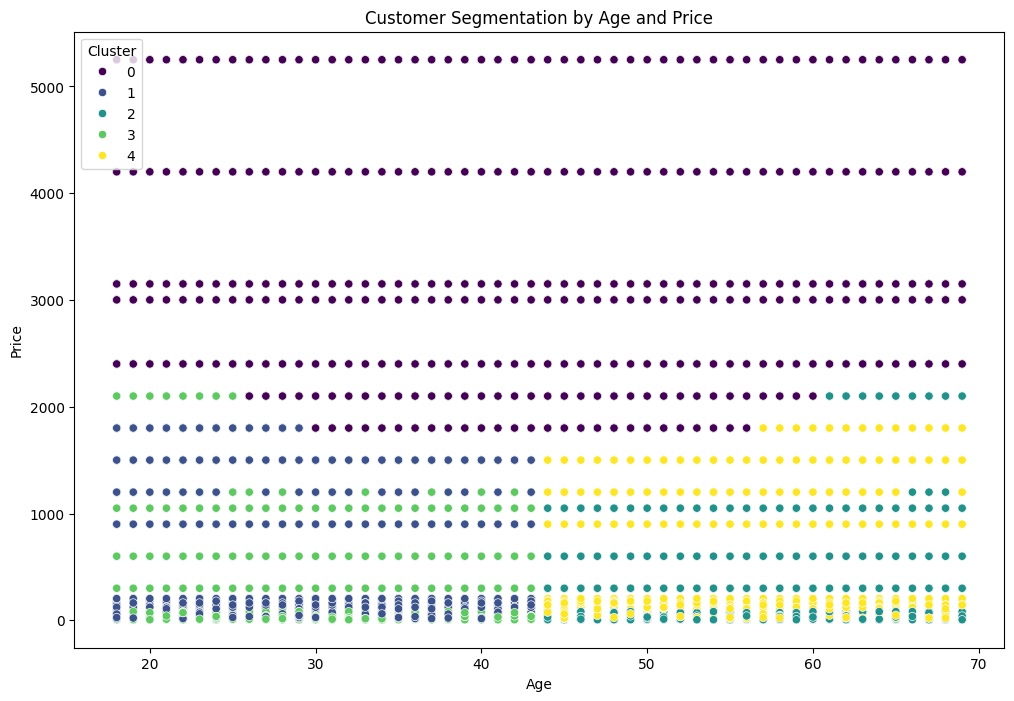

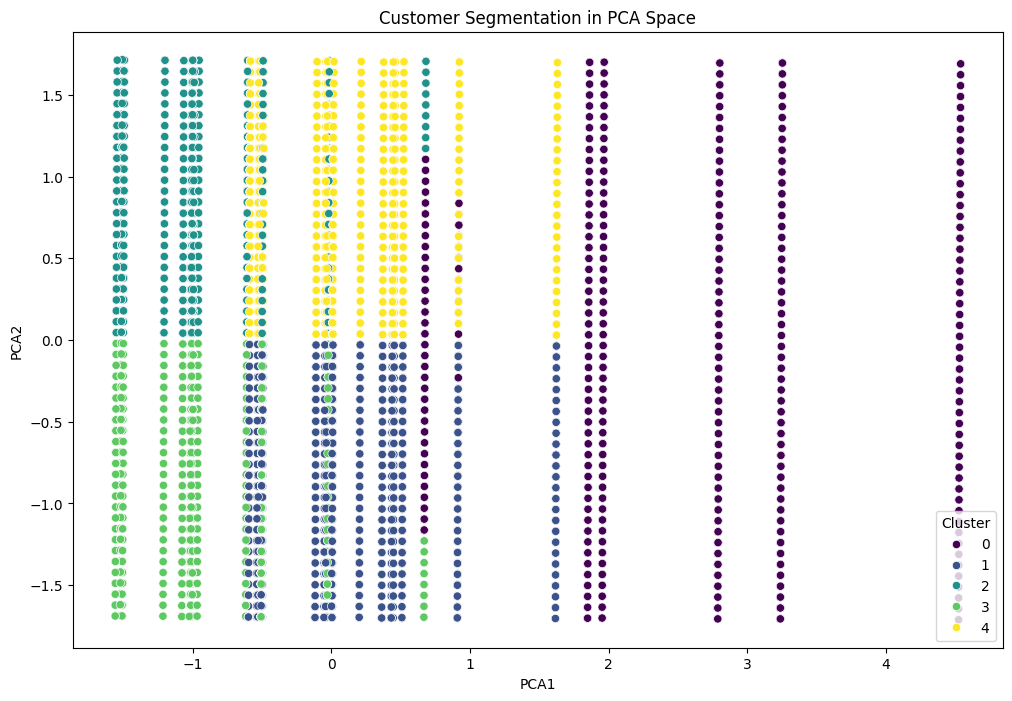

In [53]:
# Features for clustering
features = ['age', 'quantity', 'price', 'category']

# Prepare the data for clustering
X = ShoppingRetail[features]

# Define the preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'quantity', 'price']),
        ('cat', OneHotEncoder(), ['category'])
    ])

# Create a pipeline that includes preprocessing and KMeans clustering
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clusterer', KMeans(n_clusters=5, random_state=42))  # You can choose the number of clusters
])

# Fit the model
pipeline.fit(X)

# Predict clusters
ShoppingRetail['Cluster'] = pipeline.predict(X)

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='price', hue='Cluster', data=ShoppingRetail, palette='viridis')
plt.title('Customer Segmentation by Age and Price')
plt.xlabel('Age')
plt.ylabel('Price')
plt.legend(title='Cluster')
plt.show()

# To visualize clusters in more dimensions, you can use dimensionality reduction techniques like PCA
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(preprocessor.fit_transform(X))

# Add PCA components and cluster labels to the dataframe
ShoppingRetail['PCA1'] = X_pca[:, 0]
ShoppingRetail['PCA2'] = X_pca[:, 1]

# Scatter plot of PCA components
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=ShoppingRetail, palette='viridis')
plt.title('Customer Segmentation in PCA Space')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()